In [44]:
# Imports libraries

from textblob import TextBlob
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import nltk
import nltk
import re
import nltk
from nltk.probability import FreqDist
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger')
nltk.download('averaged_perceptron_tagger_eng')
from collections import Counter
from collections import defaultdict
sns.set()

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/parthamandal/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/parthamandal/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/parthamandal/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/parthamandal/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /Users/parthamandal/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


In [45]:
# Import txt file

with open('Key_events_20th_century.txt', 'r', errors='ignore') as file: 
   data = file.read().replace( '\n', ' ')

# TOKENIZATION

In [46]:
# Sentense tokenization
from nltk.tokenize import sent_tokenize
tokenized_sent = sent_tokenize(data)
print(tokenized_sent)

['   The 20th century changed the world in unprecedented ways.', 'The World Wars sparked tension between countries and led to the creation of atomic bombs, the Cold War led to the Space Race and the creation of space-based rockets, and the World Wide Web was created.', "These advancements have played a significant role in citizens' lives and shaped the 21st century into what it is today.", 'Historic events in the 20th century  World at the beginning of the century  The new beginning of the 20th century marked significant changes.', 'The 1900s saw the decade herald a series of inventions, including the automobile, airplane and radio broadcasting.', '1914 saw the completion of the Panama Canal.', 'From 1914 to 1918, the First World War, and its aftermath, caused major changes in the power balance of the world, destroying or transforming some of the most powerful empires.', 'The First World War (or simply WWI), termed "The Great War" by contemporaries, started in July 1914 and ended in No

In [47]:
# Word tokenization
from nltk.tokenize import word_tokenize
tokenized_word = word_tokenize(data)
print(tokenized_word)

['The', '20th', 'century', 'changed', 'the', 'world', 'in', 'unprecedented', 'ways', '.', 'The', 'World', 'Wars', 'sparked', 'tension', 'between', 'countries', 'and', 'led', 'to', 'the', 'creation', 'of', 'atomic', 'bombs', ',', 'the', 'Cold', 'War', 'led', 'to', 'the', 'Space', 'Race', 'and', 'the', 'creation', 'of', 'space-based', 'rockets', ',', 'and', 'the', 'World', 'Wide', 'Web', 'was', 'created', '.', 'These', 'advancements', 'have', 'played', 'a', 'significant', 'role', 'in', 'citizens', "'", 'lives', 'and', 'shaped', 'the', '21st', 'century', 'into', 'what', 'it', 'is', 'today', '.', 'Historic', 'events', 'in', 'the', '20th', 'century', 'World', 'at', 'the', 'beginning', 'of', 'the', 'century', 'The', 'new', 'beginning', 'of', 'the', '20th', 'century', 'marked', 'significant', 'changes', '.', 'The', '1900s', 'saw', 'the', 'decade', 'herald', 'a', 'series', 'of', 'inventions', ',', 'including', 'the', 'automobile', ',', 'airplane', 'and', 'radio', 'broadcasting', '.', '1914', '

In [48]:
# frequency distribution
from nltk.probability import FreqDist
dist_words = FreqDist(tokenized_word)
print(dist_words)

<FreqDist with 4520 samples and 20559 outcomes>


In [49]:
# Top 10 words
top10 = dist_words.most_common(10)
top10

[('.', 1548),
 ('the', 1061),
 (',', 939),
 ('of', 581),
 ('and', 384),
 ('to', 313),
 ('The', 293),
 ('in', 282),
 ("''", 267),
 ('[', 267)]

In [50]:
# Convert to DataFrame for plotting
df = pd.DataFrame(top10, columns=['Word', 'Frequency'])

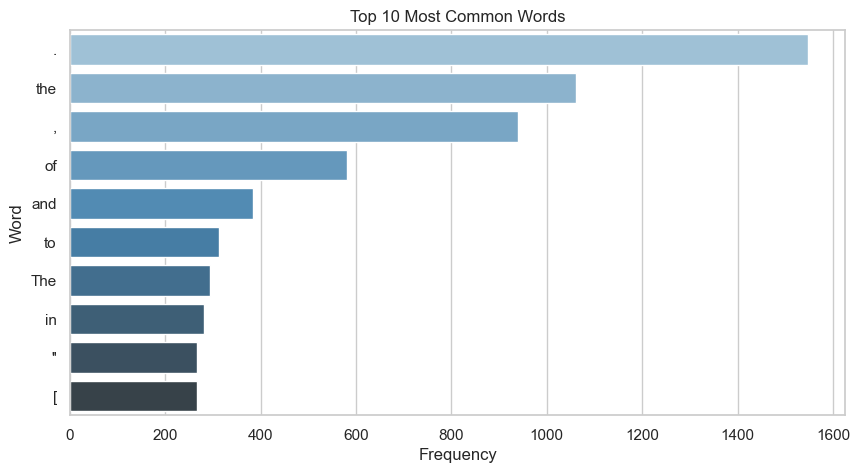

In [51]:
# Bar chart of top10
plt.figure(figsize=(10, 5))
sns.set_theme(style="whitegrid")
sns.barplot(
    x="Frequency",
    y="Word",
    data=df,
    hue="Word",         # Assign hue
    palette="Blues_d",  # Use palette
    legend=False        # Hide legend (since it's the same as y-axis)
)

plt.title("Top 10 Most Common Words")
plt.xlabel("Frequency")
plt.ylabel("Word")
plt.show()

In [52]:
# Defining stopwords
from nltk.corpus import stopwords
stop_words = set(stopwords.words("english"))

# Removing stopwords in words
filtered_words = [] 
for word in tokenized_word:
    if word not in stop_words:
        filtered_words.append(word)
print(filtered_words)

['The', '20th', 'century', 'changed', 'world', 'unprecedented', 'ways', '.', 'The', 'World', 'Wars', 'sparked', 'tension', 'countries', 'led', 'creation', 'atomic', 'bombs', ',', 'Cold', 'War', 'led', 'Space', 'Race', 'creation', 'space-based', 'rockets', ',', 'World', 'Wide', 'Web', 'created', '.', 'These', 'advancements', 'played', 'significant', 'role', 'citizens', "'", 'lives', 'shaped', '21st', 'century', 'today', '.', 'Historic', 'events', '20th', 'century', 'World', 'beginning', 'century', 'The', 'new', 'beginning', '20th', 'century', 'marked', 'significant', 'changes', '.', 'The', '1900s', 'saw', 'decade', 'herald', 'series', 'inventions', ',', 'including', 'automobile', ',', 'airplane', 'radio', 'broadcasting', '.', '1914', 'saw', 'completion', 'Panama', 'Canal', '.', 'From', '1914', '1918', ',', 'First', 'World', 'War', ',', 'aftermath', ',', 'caused', 'major', 'changes', 'power', 'balance', 'world', ',', 'destroying', 'transforming', 'powerful', 'empires', '.', 'The', 'First

In [53]:
# Create a new FreqDist for filtered–words
Dist_words_filter = FreqDist(filtered_words)

# Substitute all punctuation marks with a space
sans_punc = re.sub("[^a-zA-Z]",  # Search for all non-letters
                        " ",        # Replace all non-letters with spaces
                        str(filtered_words))

In [54]:
# Word tokenization
tokenized_word_2 = word_tokenize(sans_punc)

# Create a new FreqDist
dist_words_filter_2 = FreqDist(tokenized_word_2)
print (dist_words_filter_2)


<FreqDist with 3865 samples and 10260 outcomes>


In [55]:
new_stopwords = ["And", "Then", 'n', 't', 's', 'The', 'b', 'l', 'g', 'T', 'B', 'th', 'C'
 'm', 'e']

filtered = []
for word in tokenized_word_2:
     if word not in new_stopwords:
        filtered.append(word)
print(filtered)

['century', 'changed', 'world', 'unprecedented', 'ways', 'World', 'Wars', 'sparked', 'tension', 'countries', 'led', 'creation', 'atomic', 'bombs', 'Cold', 'War', 'led', 'Space', 'Race', 'creation', 'space', 'based', 'rockets', 'World', 'Wide', 'Web', 'created', 'These', 'advancements', 'played', 'significant', 'role', 'citizens', 'lives', 'shaped', 'st', 'century', 'today', 'Historic', 'events', 'century', 'World', 'beginning', 'century', 'new', 'beginning', 'century', 'marked', 'significant', 'changes', 'saw', 'decade', 'herald', 'series', 'inventions', 'including', 'automobile', 'airplane', 'radio', 'broadcasting', 'saw', 'completion', 'Panama', 'Canal', 'From', 'First', 'World', 'War', 'aftermath', 'caused', 'major', 'changes', 'power', 'balance', 'world', 'destroying', 'transforming', 'powerful', 'empires', 'First', 'World', 'War', 'simply', 'WWI', 'termed', 'Great', 'War', 'contemporaries', 'started', 'July', 'ended', 'November', 'war', 'precipitated', 'Assassination', 'Sarajevo',

In [56]:
# Create a new FreqDist
dist_words_filter_3 = FreqDist(filtered)

In [57]:
# Top 10 most common words
top10 = dist_words_filter_3.most_common(10)

# Convert to DataFrame
import pandas as pd
df = pd.DataFrame(top10, columns=["Word", "Frequency"])

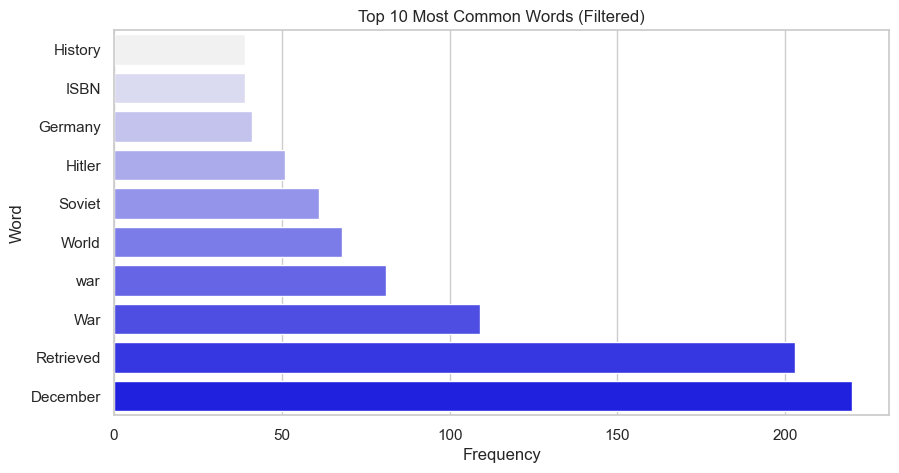

In [58]:
# Sort by frequency (ascending) so colors go from light to dark
df = df.sort_values(by="Frequency", ascending=True)

# Create light-to-dark blue gradient
colors = sns.light_palette("blue", n_colors=len(df))

# Plot
plt.figure(figsize=(10, 5))
sns.set_theme(style="whitegrid")

sns.barplot(
    x="Frequency",
    y="Word",
    hue="Word",             # Necessary for color mapping
    data=df,
    palette=colors,
    dodge=False             # Avoids group-style bars
).set_title("Top 10 Most Common Words (Filtered)")

plt.xlabel("Frequency")
plt.ylabel("Word")
plt.legend([],[], frameon=False)  # Hide legend
plt.show()

* filler words, punctuations, prepositions are cleared out. Data looks cleaner and shaping into a real context!

--> Creating Textblob and Tags

In [59]:
%%time
text = TextBlob(str(filtered))
tags_list = text.tags

CPU times: user 580 ms, sys: 4.68 ms, total: 585 ms
Wall time: 584 ms


In [60]:
df_text = pd.DataFrame(tags_list)
df_text.columns = [ 'Words', "Word type"]
df_t=df_text.groupby('Word type').count().reset_index()

In [61]:
df = df_text[(df_text['Word type'] == "NNP") | (df_text['Word type'] == "NNS") | (df_text['Word type'] == "NNS")]
df.columns = ["Word", "Occurrences"]
x = df.groupby('Word').count().reset_index()
y = x.sort_values(by = ['Occurrences'], ascending=False)
top10 = y.nlargest(10, 'Occurrences')
print(top10)

           Word  Occurrences
263   'December          220
1156       'War          109
2311       'war           81
1198     'World           68
1019    'Soviet           61
487     'Hitler           51
509       'ISBN           39
486    'History           39
1600     'first           35
2334     'world           34


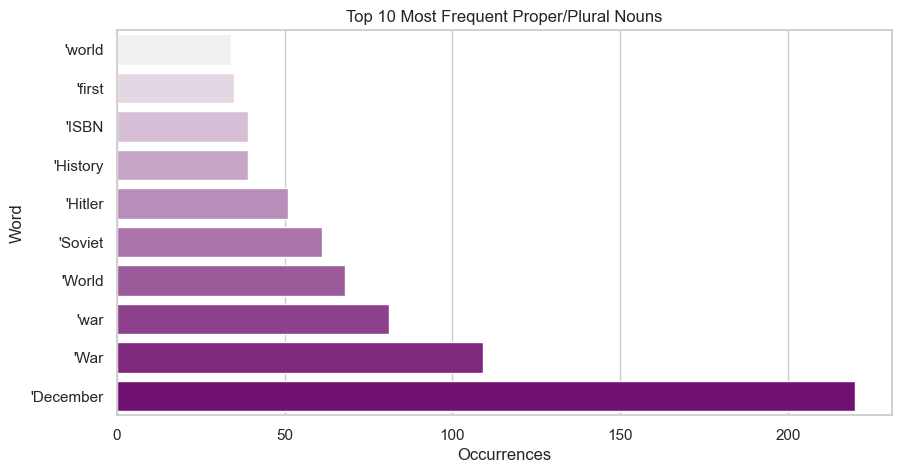

In [62]:
# Optional: sort for color gradient
top10 = top10.sort_values(by='Occurrences', ascending=True)

# Create a color gradient from light to dark
colors = sns.light_palette("purple", n_colors=len(top10))

# Plot
plt.figure(figsize=(10, 5))
sns.set_theme(style="whitegrid")

sns.barplot(
    x="Occurrences",
    y="Word",
    hue="Word",               # Required to apply the gradient
    palette=colors,
    data=top10,
    dodge=False
).set_title("Top 10 Most Frequent Proper/Plural Nouns")

plt.xlabel("Occurrences")
plt.ylabel("Word")
plt.legend([],[], frameon=False)  # Hide legend
plt.show()

In [63]:
df_text = pd.DataFrame(tags_list, columns=["Word", "POS"])

# Group and count word frequencies per POS tag
df_grouped = df_text.groupby(["POS", "Word"]).size().reset_index(name="Frequency")

# Define POS tag groups
noun_tags = ['NN', 'NNS', 'NNP', 'NNPS']
verb_tags = ['VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ']
adj_tags  = ['JJ', 'JJR', 'JJS']

# Filter and get top 15 from each category
top_nouns = df_grouped[df_grouped['POS'].isin(noun_tags)].sort_values('Frequency', ascending=False).head(15)
top_verbs = df_grouped[df_grouped['POS'].isin(verb_tags)].sort_values('Frequency', ascending=False).head(15)
top_adjs  = df_grouped[df_grouped['POS'].isin(adj_tags)].sort_values('Frequency', ascending=False).head(15)

<Figure size 1800x1200 with 0 Axes>

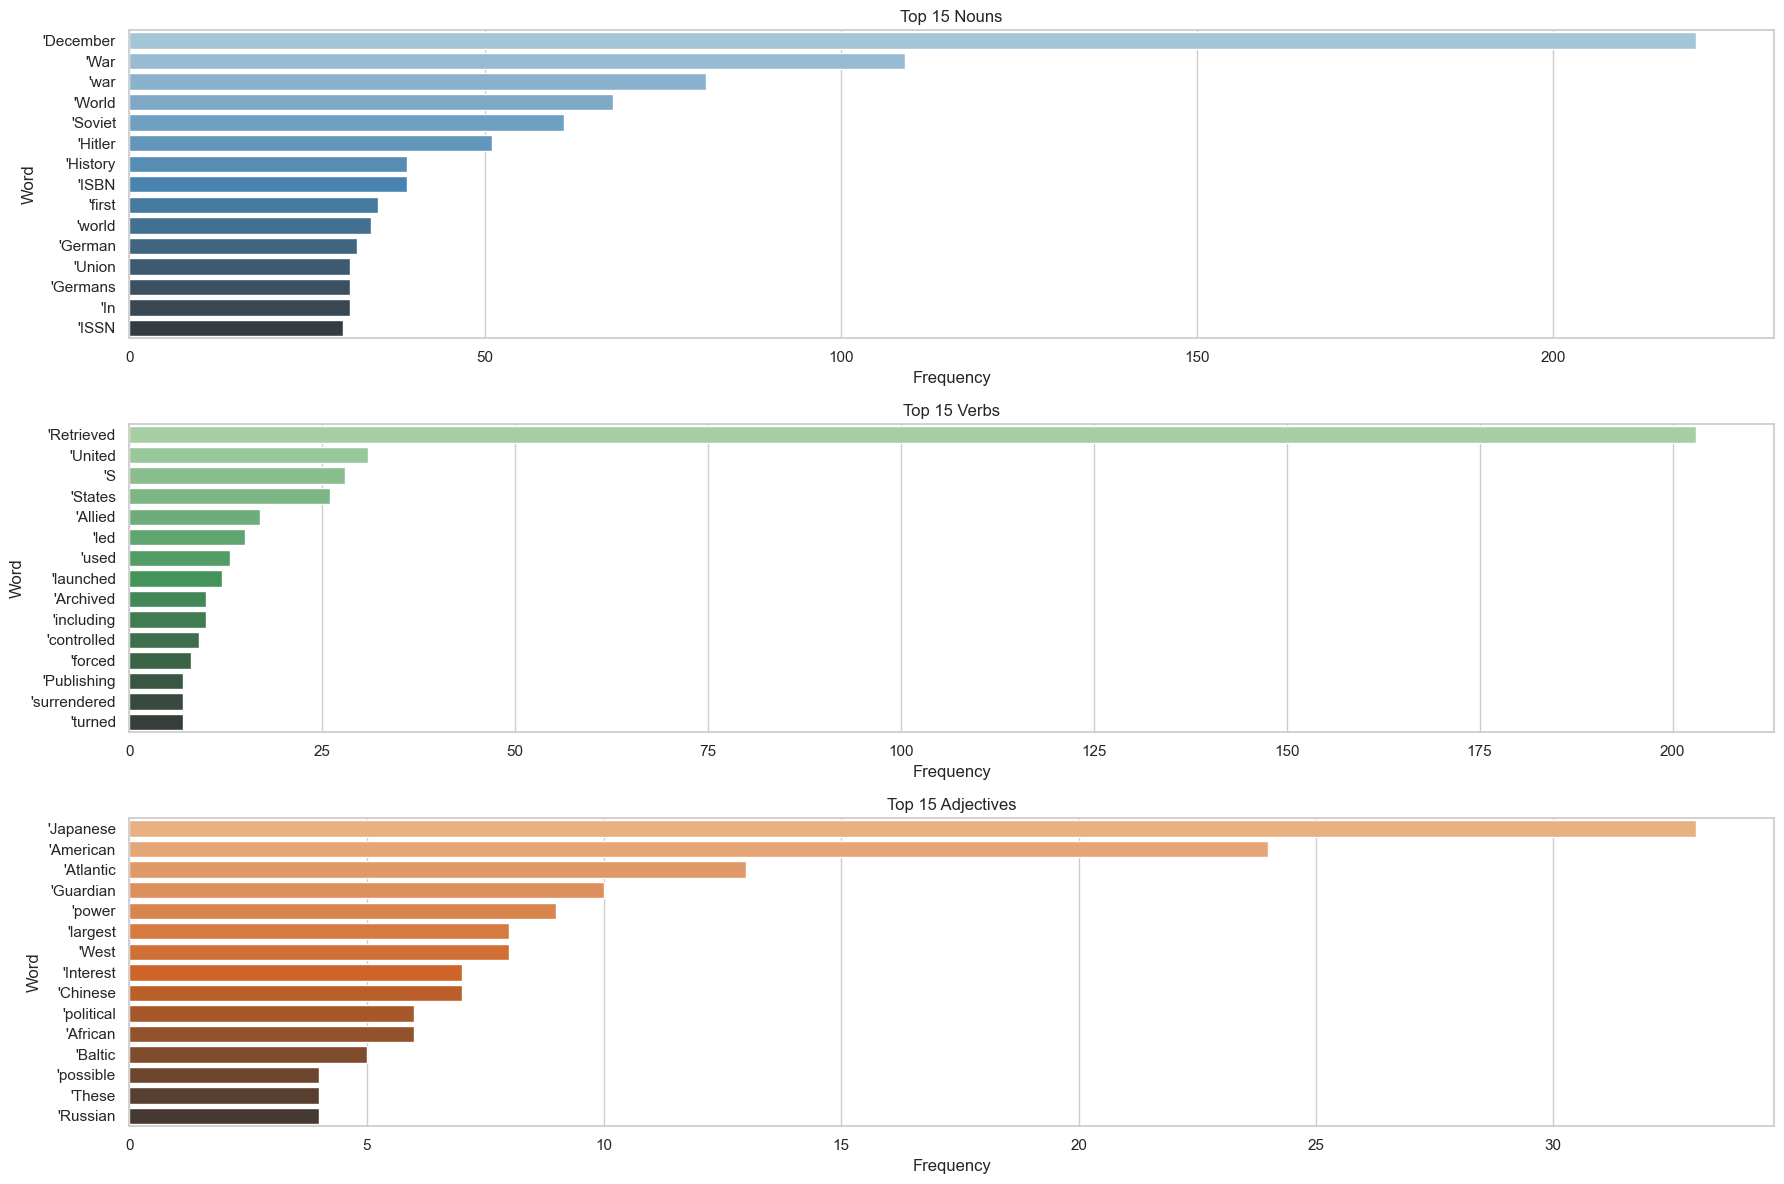

In [64]:
# Create three bar plots with the top 15 POS labels
plt.figure(figsize=(18, 12))
sns.set_theme(style="whitegrid")

plt.figure(figsize=(18, 12))
sns.set_theme(style="whitegrid")

# Nouns
plt.subplot(3, 1, 1)
sns.barplot(x="Frequency", y="Word", hue="Word", data=top_nouns, palette="Blues_d", dodge=False, legend=False)
plt.title("Top 15 Nouns")

# Verbs
plt.subplot(3, 1, 2)
sns.barplot(x="Frequency", y="Word", hue="Word", data=top_verbs, palette="Greens_d", dodge=False, legend=False)
plt.title("Top 15 Verbs")

# Adjectives
plt.subplot(3, 1, 3)
sns.barplot(x="Frequency", y="Word", hue="Word", data=top_adjs, palette="Oranges_d", dodge=False, legend=False)
plt.title("Top 15 Adjectives")

plt.tight_layout()
plt.show()

* More use of noun than Verbs or Adjectives. Although there are some misinterpretion of verbs such as 'United' and 'S'

# List of Countries

In [65]:
# Load country list and normalize
df = pd.read_csv('countries_list_20th_century.csv', encoding='utf-8')
df.columns = df.columns.str.strip().str.lower()

In [66]:
# Prepare text string (already tokenized)
text_string = " ".join(filtered_words).lower()

In [67]:
# Define aliases for country names
aliases = {
    "united states": ["usa", "america", "u.s.", "united states of america"],
    "united kingdom": ["uk", "britain", "england", "great britain"],
    "south korea": ["korea", "republic of korea"],
    "north korea": ["dprk"],
    "china": ["prc", "peoples republic of china"],
    "russia": ["soviet union", "ussr"],
}

In [68]:
# Build a full match list with aliases
all_countries = df['country_name'].dropna().str.strip().str.lower().tolist()
expanded = defaultdict(list)

for country in all_countries:
    # Add official name
    expanded[country].append(country)
    # Add aliases if any
    if country in aliases:
        expanded[country].extend(aliases[country])

In [69]:
# Count matches using a lambda
country_counts = [
    (
        country.title(),
        sum(len(re.findall(rf'\b{re.escape(name)}\b', text_string)) for name in names)
    )
    for country, names in expanded.items()
]

In [74]:
# Create DataFrame
country_mentions = pd.DataFrame(country_counts, columns=["Country", "Mentions"])
country_mentions = country_mentions.sort_values(by="Mentions", ascending=False).reset_index(drop=True)
print(country_mentions.head(10))

          Country  Mentions
0          Russia        48
1         Germany        41
2           Japan        33
3   United States        29
4  United Kingdom        27
5          France        17
6           Italy        14
7          Poland        13
8         Vietnam        12
9           India         9


In [76]:
# Build alias list for each country
expanded = defaultdict(list)

for country in df['country_name'].dropna().str.strip().str.lower().tolist():
    expanded[country].append(country)
    if country in aliases:
        expanded[country].extend(aliases[country])

# Remove duplicates from alias lists
for country in expanded:
    expanded[country] = list(set(expanded[country]))

# Prepare data for export
alias_data = [
    {"Country": country.title(), "Aliases": ", ".join(sorted(names))}
    for country, names in expanded.items()
]

# Create DataFrame and export
alias_df = pd.DataFrame(alias_data)
alias_df = alias_df.sort_values(by="Country").reset_index(drop=True)
alias_df.to_csv("country_aliases.csv", index=False)

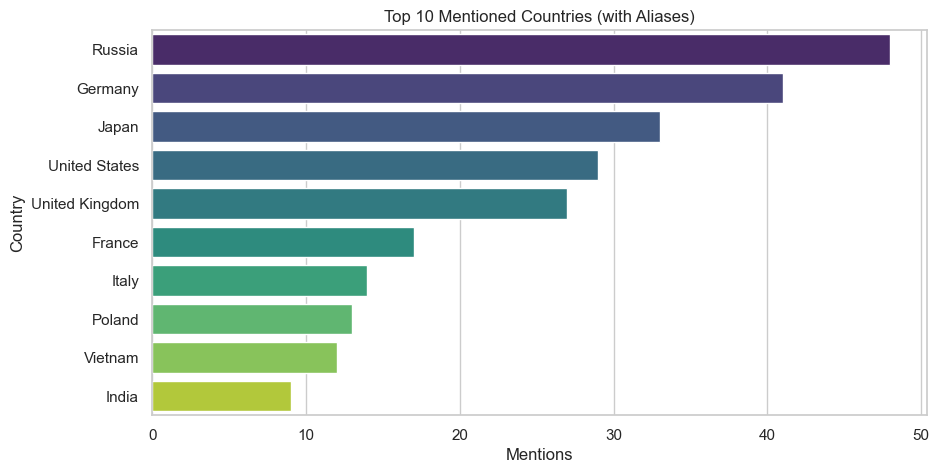

In [77]:
# Plot
plt.figure(figsize=(10, 5))
sns.barplot(
    x="Mentions",
    y="Country",
    hue="Country",
    data=country_mentions.head(10),
    dodge=False,
    palette="viridis",
    legend=False
)
plt.title("Top 10 Mentioned Countries (with Aliases)")
plt.xlabel("Mentions")
plt.ylabel("Country")
plt.show()


**Not bad but korea, china is missing!!**

# Sentiment Analysis

In [78]:
text_sent = TextBlob(str(filtered))
print(text_sent.sentiment)

Sentiment(polarity=0.04660148696993177, subjectivity=0.35141384158337086)


**very slight positive tone and is mostly objective**